In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


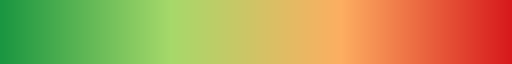

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette'
subfolder = glob.glob(cwd + '/Abs-In-BX_PL-In-SR_out-SR/CsPb**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette/Abs-In-BX_PL-In-SR_out-SR/CsPbBr_dilute_00
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette/Abs-In-BX_PL-In-SR_out-SR/CsPbBr_dilute_02
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette/Abs-In-BX_PL-In-SR_out-SR/CsPbBr_dilute_04
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette/Abs-In-BX_PL-In-SR_out-SR/CsPbBr_dilute_08
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230829_OceanView_cuvette/Abs-In-BX_PL-In-SR_out-SR/CsPbBr_dilute_16


In [6]:
dilute_list = [os.path.basename(i) for i in subfolder]
dilute_list

['CsPbBr_dilute_00',
 'CsPbBr_dilute_02',
 'CsPbBr_dilute_04',
 'CsPbBr_dilute_08',
 'CsPbBr_dilute_16']

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [7]:
df = pd.DataFrame()
# quinine_con = ['1E-4', '2E-4']
# fiber_list2 = ['Abs-BX_out-SR', 'Abs-SR_out-BX', 'Abs-SR_out-SR']

for i in range(len(subfolder)):
    # data_files = subfolder
    data_files = glob.glob(subfolder[i] + '/**Subt**')
    data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix}'] = df_int['Wavelength']
    df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

## Export PL of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [8]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20230829_CsPbBr_PL.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [9]:
df

x_CsPbBr_dilute_00  CsPbBr_dilute_00_mean  x_CsPbBr_dilute_02  \
0                197.742              -0.360000             197.742   
1                198.544              -0.481111             198.544   
2                199.347              -0.533333             199.347   
3                200.149              -0.580000             200.149   
4                200.951              -0.610000             200.951   
...                  ...                    ...                 ...   
1039             990.770               0.131111             990.770   
1040             991.489               0.166667             991.489   
1041             992.208               0.226667             992.208   
1042             992.928               0.278889             992.928   
1043             993.647               0.358889             993.647   

      CsPbBr_dilute_02_mean  x_CsPbBr_dilute_04  CsPbBr_dilute_04_mean  \
0                 -0.304444             197.742              -0.566667   
1                 -0.482222             198.544              -0.642222   
2                 -0.462222             199.347              -0.711111   
3                 -0.452222             200.149              -0.643333   
4                 -0.441111             200.951              -0.633333   
...                     ...                 ...                    ...   
1039               0.148889             990.770               0.153333   
1040               0.166667             991.489               0.248889   
1041               0.204444             992.208               0.330000   
1042               0.172222             992.928               0.404444   
1043               0.304444             993.647               0.567778   

      x_CsPbBr_dilute_08  CsPbBr_dilute_08_mean  x_CsPbBr_dilute_16  \
0                197.742              -0.476667             197.742   
1                198.544              -0.558889             198.544   
2                199.347              -0.547778             199.347   
3                200.149              -0.494444             200.149   
4                200.951              -0.486667             200.951   
...                  ...                    ...                 ...   
1039             990.770               0.188889             990.770   
1040             991.489               0.231111             991.489   
1041             992.208               0.286667             992.208   
1042             992.928               0.286667             992.928   
1043             993.647               0.476667             993.647   

      CsPbBr_dilute_16_mean  
0                 -0.421111  
1                 -0.404444  
2                 -0.450000  
3                 -0.428889  
4                 -0.433333  
...                     ...  
1039               0.228889  
1040               0.272222  
1041               0.262222  
1042               0.276667  
1043               0.421111  

[1044 rows x 10 columns]

## Check data in pd dataframe

In [10]:
df.keys()

Index(['x_CsPbBr_dilute_00', 'CsPbBr_dilute_00_mean', 'x_CsPbBr_dilute_02',
       'CsPbBr_dilute_02_mean', 'x_CsPbBr_dilute_04', 'CsPbBr_dilute_04_mean',
       'x_CsPbBr_dilute_08', 'CsPbBr_dilute_08_mean', 'x_CsPbBr_dilute_16',
       'CsPbBr_dilute_16_mean'],
      dtype='object')

In [11]:
df.shape

(1044, 10)

## Prepare keys for average scans in pd dataframe

In [12]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_CsPbBr_dilute_00',
 'CsPbBr_dilute_00_mean',
 'x_CsPbBr_dilute_02',
 'CsPbBr_dilute_02_mean',
 'x_CsPbBr_dilute_04',
 'CsPbBr_dilute_04_mean',
 'x_CsPbBr_dilute_08',
 'CsPbBr_dilute_08_mean',
 'x_CsPbBr_dilute_16',
 'CsPbBr_dilute_16_mean']

In [13]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

CsPbBr_dilute_00_mean
CsPbBr_dilute_02_mean
CsPbBr_dilute_04_mean
CsPbBr_dilute_08_mean
CsPbBr_dilute_16_mean


## Plot all PL scans together

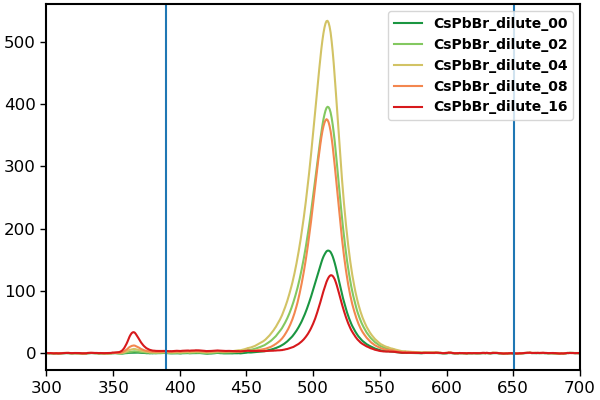

In [14]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)

ax1.set_xlim(300, 700)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 650]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

ax1.axvline(w0)
ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [15]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [16]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

Data_source  Simpson_integrate
0  CsPbBr_dilute_00_mean        5084.877575
1  CsPbBr_dilute_02_mean       12608.060566
2  CsPbBr_dilute_04_mean       17257.294893
3  CsPbBr_dilute_08_mean       11125.691342
4  CsPbBr_dilute_16_mean        3581.825289

## Save Simpson integrate of PL peak

In [17]:
# df_int.to_csv(os.path.join(new_dir, 'CsPbBr_dilute_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [18]:
# df_int.to_csv('CsPbBr_dilute_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [19]:
df2 = pd.DataFrame()
# quinine_con = ['1E-4', '2E-4']
# fiber_list2 = ['Abs-BX_out-SR', 'Abs-SR_out-BX', 'Abs-SR_out-SR']

for i in range(len(subfolder)):
    # data_files = subfolder
    data_files = glob.glob(subfolder[i] + '/**Absorbance**')
    data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(subfolder_PL[i])
    suffix = dilute_list[i]
    # id0 = 8
    # id1 = 22

    skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):        
        df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
        df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix}'] = df_int['Wavelength']
    df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


## Export Absorbance of dilute CsPbBr3 for PLQY_summary_02.ipynb

In [20]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20230829_CsPbBr_abs.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [21]:
df2

x_CsPbBr_dilute_00  CsPbBr_dilute_00_mean  x_CsPbBr_dilute_02  \
0                197.742               0.002222             197.742   
1                198.544               0.002222             198.544   
2                199.347               0.007778             199.347   
3                200.149               0.010000             200.149   
4                200.951               0.010000             200.951   
...                  ...                    ...                 ...   
1039             990.770               0.000000             990.770   
1040             991.489               0.000000             991.489   
1041             992.208               0.000000             992.208   
1042             992.928               0.000000             992.928   
1043             993.647               0.002222             993.647   

      CsPbBr_dilute_02_mean  x_CsPbBr_dilute_04  CsPbBr_dilute_04_mean  \
0                 -0.041111             197.742              -0.002222   
1                 -0.052222             198.544              -0.036667   
2                 -0.043333             199.347              -0.031111   
3                 -0.046667             200.149              -0.031111   
4                 -0.046667             200.951              -0.031111   
...                     ...                 ...                    ...   
1039              -0.050000             990.770              -0.030000   
1040              -0.050000             991.489              -0.030000   
1041              -0.050000             992.208              -0.030000   
1042              -0.050000             992.928              -0.030000   
1043              -0.041111             993.647              -0.002222   

      x_CsPbBr_dilute_08  CsPbBr_dilute_08_mean  x_CsPbBr_dilute_16  \
0                197.742              -0.007273             197.742   
1                198.544              -0.013636             198.544   
2                199.347              -0.013636             199.347   
3                200.149              -0.014545             200.149   
4                200.951              -0.012727             200.951   
...                  ...                    ...                 ...   
1039             990.770              -0.020000             990.770   
1040             991.489              -0.020000             991.489   
1041             992.208              -0.020000             992.208   
1042             992.928              -0.020000             992.928   
1043             993.647              -0.007273             993.647   

      CsPbBr_dilute_16_mean  
0                  0.005556  
1                 -0.004444  
2                 -0.003333  
3                 -0.003333  
4                 -0.003333  
...                     ...  
1039              -0.007778  
1040              -0.007778  
1041              -0.006667  
1042              -0.010000  
1043               0.005556  

[1044 rows x 10 columns]

## Prepare keys for average scans in pd dataframe

In [22]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_CsPbBr_dilute_00',
 'CsPbBr_dilute_00_mean',
 'x_CsPbBr_dilute_02',
 'CsPbBr_dilute_02_mean',
 'x_CsPbBr_dilute_04',
 'CsPbBr_dilute_04_mean',
 'x_CsPbBr_dilute_08',
 'CsPbBr_dilute_08_mean',
 'x_CsPbBr_dilute_16',
 'CsPbBr_dilute_16_mean']

In [23]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

CsPbBr_dilute_00_mean
CsPbBr_dilute_02_mean
CsPbBr_dilute_04_mean
CsPbBr_dilute_08_mean
CsPbBr_dilute_16_mean


## Plot all Abs scans together

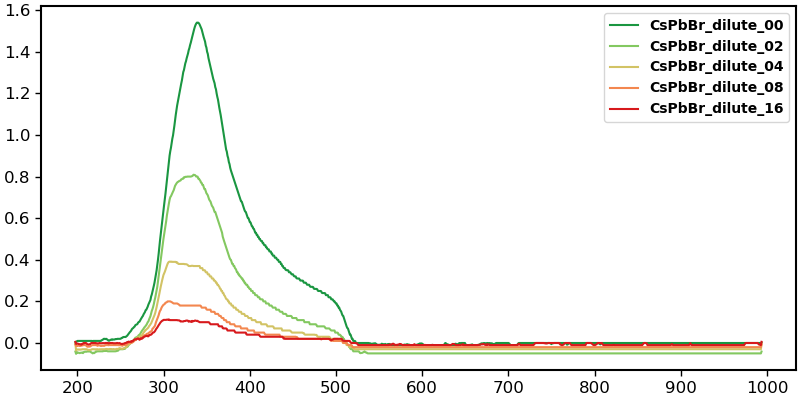

In [24]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [25]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


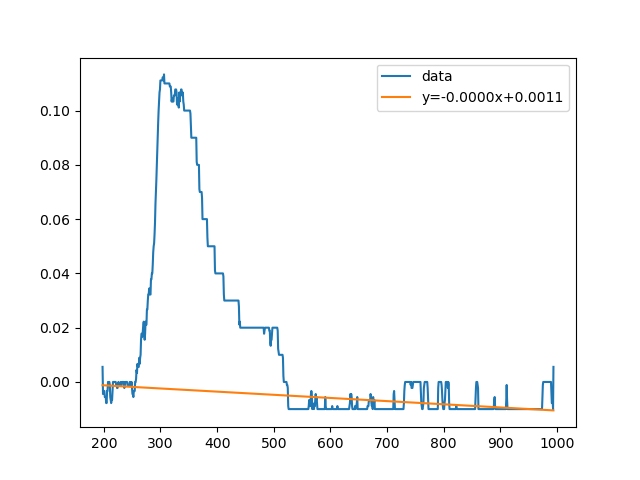

In [26]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[600, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[500, 900])

In [27]:
title.append('dummy')
title

['CsPbBr_dilute_00_mean',
 'CsPbBr_dilute_02_mean',
 'CsPbBr_dilute_04_mean',
 'CsPbBr_dilute_08_mean',
 'CsPbBr_dilute_16_mean',
 'dummy']

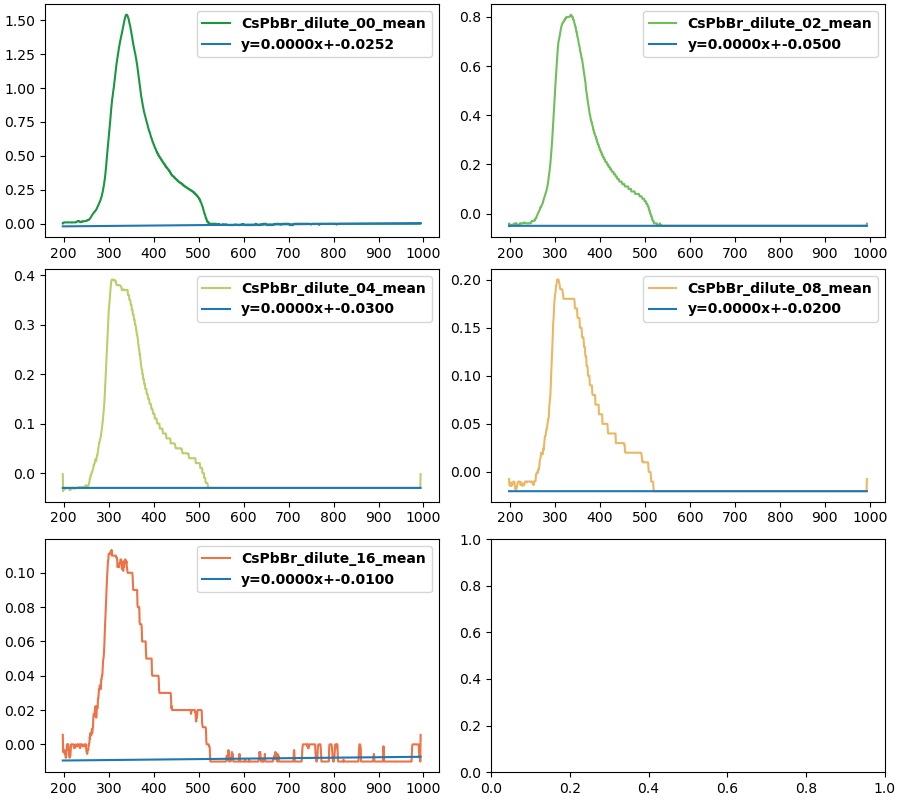

In [28]:
rows = 3
cols = 2
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [29]:
title = keys_list2[1::2]

## Plot Abs by offset

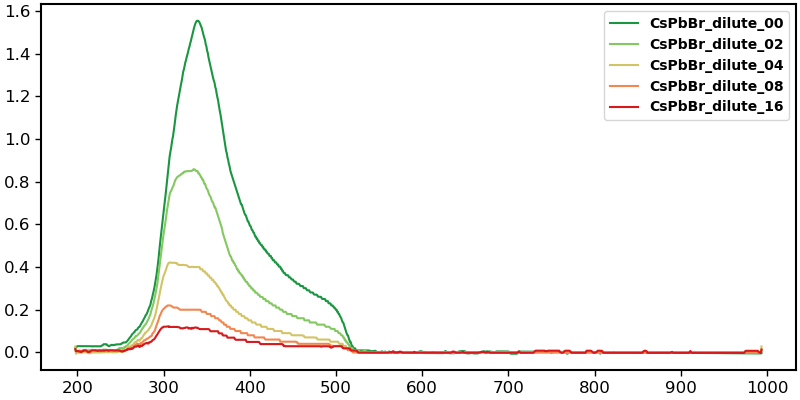

In [30]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [31]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_CsPbBr_dilute_00',
 'CsPbBr_dilute_00_mean',
 'x_CsPbBr_dilute_02',
 'CsPbBr_dilute_02_mean',
 'x_CsPbBr_dilute_04',
 'CsPbBr_dilute_04_mean',
 'x_CsPbBr_dilute_08',
 'CsPbBr_dilute_08_mean',
 'x_CsPbBr_dilute_16',
 'CsPbBr_dilute_16_mean']

## Save offset data as csv

In [32]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

CsPbBr_dilute_00_offset.csv
CsPbBr_dilute_02_offset.csv
CsPbBr_dilute_04_offset.csv
CsPbBr_dilute_08_offset.csv
CsPbBr_dilute_16_offset.csv


## Save Absorbance at 365 nm

In [33]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

Data_source  Abs_365  Abs_offset_365
0  CsPbBr_dilute_00_mean     1.13        1.144100
1  CsPbBr_dilute_02_mean     0.57        0.620000
2  CsPbBr_dilute_04_mean     0.27        0.300000
3  CsPbBr_dilute_08_mean     0.13        0.150000
4  CsPbBr_dilute_16_mean     0.08        0.088952

In [34]:
# df_365.to_csv(os.path.join(new_dir, 'CsPbBr_dilute_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [35]:
# df_365.to_csv('CsPbBr_dilute_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [36]:
df2.keys()

Index(['x_CsPbBr_dilute_00', 'CsPbBr_dilute_00_mean', 'x_CsPbBr_dilute_02',
       'CsPbBr_dilute_02_mean', 'x_CsPbBr_dilute_04', 'CsPbBr_dilute_04_mean',
       'x_CsPbBr_dilute_08', 'CsPbBr_dilute_08_mean', 'x_CsPbBr_dilute_16',
       'CsPbBr_dilute_16_mean'],
      dtype='object')

## Import analysis functions

In [37]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

## Gaussian peak fittimg

In [38]:
keys_list.append('x_dummy')
keys_list.append('dummy')
keys_list

['x_CsPbBr_dilute_00',
 'CsPbBr_dilute_00_mean',
 'x_CsPbBr_dilute_02',
 'CsPbBr_dilute_02_mean',
 'x_CsPbBr_dilute_04',
 'CsPbBr_dilute_04_mean',
 'x_CsPbBr_dilute_08',
 'CsPbBr_dilute_08_mean',
 'x_CsPbBr_dilute_16',
 'CsPbBr_dilute_16_mean',
 'x_dummy',
 'dummy']

CsPbBr_dilute_00_mean passes c1 so is good.

** Average of CsPbBr_dilute_00_mean has peaks at [143]**


** start to do peak fitting by Gaussian**

CsPbBr_dilute_00_mean passes c1 so is good.

** Average of CsPbBr_dilute_00_mean has peaks at [142]**


** start to do peak fitting by Gaussian**

CsPbBr_dilute_00_mean passes c1 so is good.

** Average of CsPbBr_dilute_00_mean has peaks at [142]**


** start to do peak fitting by Gaussian**

CsPbBr_dilute_02_mean passes c1 so is good.

** Average of CsPbBr_dilute_02_mean has peaks at [141]**


** start to do peak fitting by Gaussian**

CsPbBr_dilute_02_mean passes c1 so is good.

** Average of CsPbBr_dilute_02_mean has peaks at [145]**


** start to do peak fitting by Gaussian**



/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py:83: RuntimeWarning: invalid value encountered in double_scalars
  r_sq = 1 - (ss_res / ss_tot)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py:83: RuntimeWarning: invalid value encountered in double_s

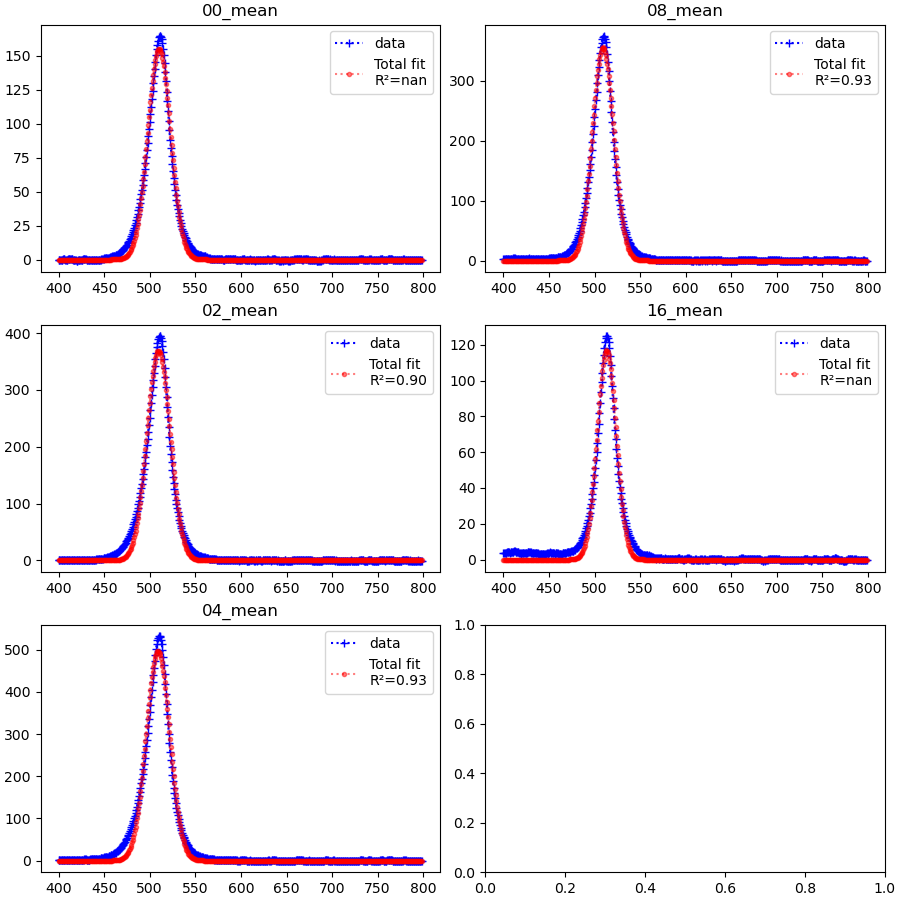

In [39]:
rows = 3
cols = 2
f5, ax5 = plt.subplots(rows, cols, figsize = (9, 9), constrained_layout=True)
# ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

key_x_reshape = np.asarray(keys_list[0::2]).reshape(cols, rows).T
key_y_reshape = np.asarray(keys_list[1::2]).reshape(cols, rows).T

peak_list = []
fwhm = []
simpson_int = []

for i in range(cols):
    for j in range(rows):
        #i = 4
        try:
            x0 = df[key_x_reshape[j][i]][idx1:idx2].to_numpy()
            y0 = df[key_y_reshape[j][i]][idx1:idx2].to_numpy()
            #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))

            peak, prop = good_bad_data(x0, y0, key_height=100, data_id = f'{keys_list[i*2+1]}', distance=20, height=50)
            x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{keys_list[i*2+1]}', peak, prop)  


            simpson_int.append(integrate.simpson(y,x))
            peak_list.append(popt[1])
            fwhm.append(2.355*popt[2])


            fitted_result = f(x, *popt)
            r_2 = r_square(x, y, fitted_result)
            r2 = f'R\u00b2={r_2:.2f}'
            ax5[j][i].set_title(key_y_reshape[j][i][14:27])
            ax5[j][i].plot(x,y,'b+:',label='data')
            ax5[j][i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=3)

        #     # peak 1
        #     peak_1 = _1gauss(x, *popt[0:3])
        #     ax4[i].plot(x, peak_1, "g", label='peak 1')
        #     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

        #     # peak 2
        #     peak_2 = _1gauss(x, *popt[3:6])
        #     ax4[i].plot(x, peak_2, "y", label='peak 2')
        #     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)

            ax5[j][i].legend()
        
        except (KeyError, IndexError):
            pass

In [40]:
fwhm

[29.3102654420606,
 29.97590511627578,
 30.29470519389385,
 27.260173339966883,
 24.442084856905137]

## Plot PE, FWHM, PLQY

In [41]:
def plqy_quinine(absorbance_sample, PL_integral_sample, refractive_index_solvent, 
                     absorbance_reference, PL_integral_reference, refractive_index_reference, plqy_reference):
    
    integral_ratio = PL_integral_sample / PL_integral_reference
    absorbance_ratio = absorbance_reference / absorbance_sample
    refractive_index_ratio = (refractive_index_solvent / refractive_index_reference)**2

    plqy = plqy_reference * integral_ratio * absorbance_ratio * refractive_index_ratio
    return plqy

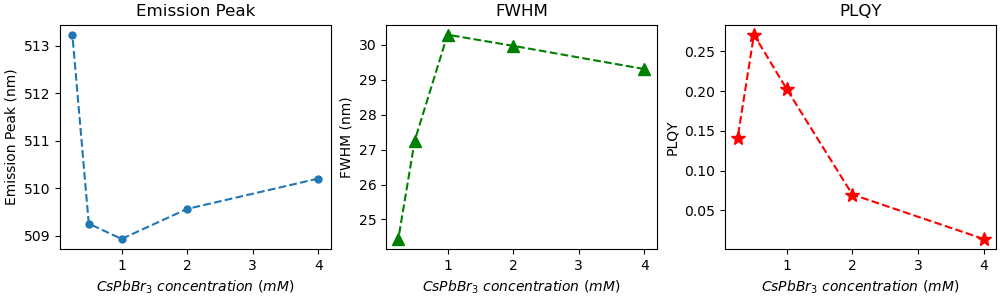

In [42]:
# abs_365 = df11.iloc[210][1::2].to_numpy()
abs_365 = df_365['Abs_365']

abs_365_r = 0.29
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 63344.8
integral_pqds = np.asarray(simpson_int)

plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
    

dilute_constant = np.asarray([1,2,4,8,16])
x_list = 4 / dilute_constant
# x_list_T = np.asarray(x_list).reshape(cols, rows).T
# peak_list_T = np.asarray(peak_list).reshape(cols, rows).T
# fwhm_T = np.asarray(fwhm).reshape(cols, rows).T
# plqy_T = np.asarray(plqy).reshape(cols, rows).T

rows = 1
cols = 3

f5, ax5 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
ax5[0].set_title('Emission Peak')
ax5[0].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')
ax5[1].set_title('FWHM')
ax5[1].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')
ax5[2].set_title('PLQY')
ax5[2].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')


ax5[0].plot(x_list, peak_list, '.--', markersize=10)
ax5[1].plot(x_list, fwhm, 'g^--', markersize=8)
ax5[2].plot(x_list, plqy, 'r*--', markersize=10)

In [43]:
x_list

array([4.  , 2.  , 1.  , 0.5 , 0.25])